In [ ]:
'''
DESCRIPTION:

Problem Statement:

1. It is a critical requirement for business to understand the value derived from a customer. RFM is a method used for analyzing customer value.
2. Customer segmentation is the practice of segregating the customer base into groups of individuals based on some common characteristics such as age, 
gender, interests, and spending habits
3. Perform customer segmentation using RFM analysis. The resulting segments can be ordered from most valuable (highest recency, frequency, and value) 
to least valuable (lowest recency, frequency, and value).
'''

'\nDESCRIPTION:\n\nProblem Statement:\n\n1. It is a critical requirement for business to understand the value derived from a customer. RFM is a method used for analyzing customer value.\n2. Customer segmentation is the practice of segregating the customer base into groups of individuals based on some common characteristics such as age, \ngender, interests, and spending habits\n3. Perform customer segmentation using RFM analysis. The resulting segments can be ordered from most valuable (highest recency, frequency, and value) \nto least valuable (lowest recency, frequency, and value).\n'

In [ ]:
'''
Project Task: Week 1
Data Cleaning:

1. Perform a preliminary data inspection and data cleaning.

a. Check for missing data and formulate an apt strategy to treat them.

b. Remove duplicate data records.

c. Perform descriptive analytics on the given data.
'''

'\nProject Task: Week 1\nData Cleaning:\n\n1. Perform a preliminary data inspection and data cleaning.\n\na. Check for missing data and formulate an apt strategy to treat them.\n\nb. Remove duplicate data records.\n\nc. Perform descriptive analytics on the given data.\n'

In [ ]:
# Importing required libraries and dataset
import pandas as pd

train_url = "https://github.com/PraveenBandla/Data-Science-Projects/blob/master/Data-Science-Capstone-Projects/Project%203%20datasets/train.xlsx?raw=true"
retail_train_df = pd.read_excel(train_url)
retail_train_df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,558904,22292,HANGING CHICK YELLOW DECORATION,1,2011-07-04 16:18:00,1.25,NaN,United Kingdom
1,556072,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,8,2011-06-08 14:57:00,3.75,16126.0,United Kingdom
2,551739,21559,STRAWBERRY LUNCH BOX WITH CUTLERY,2,2011-05-04 10:58:00,2.55,18118.0,United Kingdom
3,541658,21988,PACK OF 6 SKULL PAPER PLATES,1,2011-01-20 12:16:00,0.85,15529.0,United Kingdom
4,538364,85099C,JUMBO BAG BAROQUE BLACK WHITE,10,2010-12-10 17:26:00,1.95,14448.0,United Kingdom
...,...,...,...,...,...,...,...,...
379331,C554864,22962,JAM JAR WITH PINK LID,-4,2011-05-27 10:36:00,0.85,15122.0,United Kingdom
379332,539451,20749,ASSORTED COLOUR MINI CASES,1,2010-12-17 16:59:00,16.98,NaN,United Kingdom
379333,572302,22091,EMPIRE TISSUE BOX,1,2011-10-23 14:47:00,0.39,15427.0,United Kingdom
379334,559339,84946,ANTIQUE SILVER T-LIGHT GLASS,60,2011-07-07 16:49:00,1.25,13752.0,United Kingdom


In [ ]:
# Exploratory Data Analysis and Data Preprocessing
retail_train_df.info()

# Observations:
# 379336 rows x 8 columns
# Null values are present in the description and customer ID column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 379336 entries, 0 to 379335
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    379336 non-null  object        
 1   StockCode    379336 non-null  object        
 2   Description  378373 non-null  object        
 3   Quantity     379336 non-null  int64         
 4   InvoiceDate  379336 non-null  datetime64[ns]
 5   UnitPrice    379336 non-null  float64       
 6   CustomerID   285076 non-null  float64       
 7   Country      379336 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 23.2+ MB


In [ ]:
# Modifying customer ID type to int
#retail_train_df['CustomerID'] = retail_train_df['CustomerID'].astype('Int64')
#retail_train_df.info()

In [ ]:
# Checking for duplicates
retail_train_df[retail_train_df.duplicated()]

# Observations:
# 2673 duplicates are present in the training dataset

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
2878,575117,21098,CHRISTMAS TOILET ROLL,1,2011-11-08 14:22:00,1.25,12748.0,United Kingdom
5729,542107,21755,LOVE BUILDING BLOCK WORD,1,2011-01-25 13:38:00,5.95,16222.0,United Kingdom
7615,577778,21733,RED HANGING HEART T-LIGHT HOLDER,1,2011-11-21 16:10:00,2.95,16549.0,United Kingdom
8997,578781,22988,SOLDIERS EGG CUP,1,2011-11-25 11:54:00,1.25,15872.0,United Kingdom
14797,575583,20893,HANGING BAUBLE T-LIGHT HOLDER SMALL,1,2011-11-10 11:55:00,2.55,14456.0,United Kingdom
...,...,...,...,...,...,...,...,...
378899,577773,23507,MINI PLAYING CARDS BUFFALO BILL,1,2011-11-21 15:57:00,0.42,16712.0,United Kingdom
379020,571682,23182,TOILET SIGN OCCUPIED OR VACANT,1,2011-10-18 14:00:00,0.83,14179.0,United Kingdom
379073,564729,22208,WOOD STAMP SET THANK YOU,2,2011-08-28 12:44:00,0.83,13137.0,United Kingdom
379205,538368,22759,SET OF 3 NOTEBOOKS IN PARCEL,1,2010-12-12 10:57:00,1.65,15503.0,United Kingdom


In [ ]:
# Removing duplicates
retail_train_df.drop_duplicates(inplace=True)
retail_train_df.shape

(376663, 8)

In [ ]:
# Checking for NULL Values
retail_train_df.isna().sum()

# Observations:
# Description has 963(~0.25%) missing values whereas customer id has 94,243(~25%) missing values
# Since description column has less number of missing values, we can drop them from the dataset
# But, Customer ID has significant chunk of data missing => We have to impute it using one of the methods
# Customer ID is not a measure => we can't go for mean or median and if we replace it by mode, it will lead to biased dataset
# Instead of replacing missing values with one single value, we can impute it with multiple relative values using KNN or MICE imputation techniques

InvoiceNo          0
StockCode          0
Description      963
Quantity           0
InvoiceDate        0
UnitPrice          0
CustomerID     94243
Country            0
dtype: int64

In [ ]:
# Dropping records with null values in description column
retail_train_df = retail_train_df[retail_train_df['Description'].notna()]
retail_train_df.isna().sum()

InvoiceNo          0
StockCode          0
Description        0
Quantity           0
InvoiceDate        0
UnitPrice          0
CustomerID     93280
Country            0
dtype: int64

In [ ]:
# Encoding categorical variables before KNN imputation
from sklearn.preprocessing import LabelEncoder

# Defining Encoder
le = LabelEncoder()

# Categorical columns
cat_col = retail_train_df.columns[retail_train_df.dtypes=="object"]

# Passing train data into a new dataframe
retail_train_enc_df = retail_train_df.copy()

# Fitting and transforming on the train data
for c in cat_col:
  retail_train_enc_df[c] = le.fit_transform(retail_train_enc_df[c].astype('str'))

# Converting date into days
from datetime import datetime

retail_train_enc_df['Days'] = (datetime.today()-retail_train_enc_df['InvoiceDate']).dt.days
retail_train_enc_df.drop('InvoiceDate',axis=1,inplace=True)
retail_train_enc_df

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,Days
0,9610,1189,1626,1,1.25,NaN,36,3495
1,8375,286,2556,8,3.75,16126.0,36,3521
2,6418,655,3505,2,2.55,18118.0,36,3556
3,2135,937,2343,1,0.85,15529.0,36,3660
4,882,3380,1821,10,1.95,14448.0,36,3701
...,...,...,...,...,...,...,...,...
379331,21099,1822,1798,-4,0.85,15122.0,36,3533
379332,1319,184,242,1,16.98,NaN,36,3694
379333,15483,1009,1178,1,0.39,15427.0,36,3384
379334,9809,3229,216,60,1.25,13752.0,36,3492


In [ ]:
# Standardizing the dataset
from sklearn.preprocessing import MinMaxScaler

# Instantiation
mms = MinMaxScaler()

# Fitting and transforming on the encoded training data
retail_train_enc_df.drop('CustomerID',axis=1,inplace=True)
retail_train_enc_df = pd.DataFrame(mms.fit_transform(retail_train_enc_df),columns=retail_train_enc_df.columns)
retail_train_enc_df

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,Country,Days
0,0.419779,0.304403,0.393609,0.500006,0.221124,0.972973,0.423592
1,0.365832,0.073221,0.618736,0.500049,0.221174,0.972973,0.493298
2,0.280348,0.167691,0.848463,0.500012,0.221150,0.972973,0.587131
3,0.093260,0.239887,0.567175,0.500006,0.221116,0.972973,0.865952
4,0.038527,0.865335,0.440813,0.500062,0.221138,0.972973,0.975871
...,...,...,...,...,...,...,...
375695,0.921635,0.466462,0.435246,0.499975,0.221116,0.972973,0.525469
375696,0.057616,0.047107,0.058581,0.500006,0.221439,0.972973,0.957105
375697,0.676320,0.258321,0.285161,0.500006,0.221107,0.972973,0.126005
375698,0.428472,0.826677,0.052288,0.500370,0.221124,0.972973,0.415550


In [ ]:
# Appending customer id to encoded and standardized train data
retail_train_enc_df['CustomerID'] = retail_train_df['CustomerID']
retail_train_enc_df

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,Country,Days,CustomerID
0,0.419779,0.304403,0.393609,0.500006,0.221124,0.972973,0.423592,NaN
1,0.365832,0.073221,0.618736,0.500049,0.221174,0.972973,0.493298,16126.0
2,0.280348,0.167691,0.848463,0.500012,0.221150,0.972973,0.587131,18118.0
3,0.093260,0.239887,0.567175,0.500006,0.221116,0.972973,0.865952,15529.0
4,0.038527,0.865335,0.440813,0.500062,0.221138,0.972973,0.975871,14448.0
...,...,...,...,...,...,...,...,...
375695,0.921635,0.466462,0.435246,0.499975,0.221116,0.972973,0.525469,17787.0
375696,0.057616,0.047107,0.058581,0.500006,0.221439,0.972973,0.957105,12749.0
375697,0.676320,0.258321,0.285161,0.500006,0.221107,0.972973,0.126005,18116.0
375698,0.428472,0.826677,0.052288,0.500370,0.221124,0.972973,0.415550,14995.0


In [ ]:
# Imputing missing values in customer id column with KNN imputer
from sklearn.impute import KNNImputer

# Defining imputer
imputer = KNNImputer(n_neighbors=3)

# Fitting and transforming on the training data
retail_train_trans_df = pd.DataFrame(imputer.fit_transform(retail_train_enc_df),columns=retail_train_enc_df.columns)

# Checking for missing values after imputing
retail_train_trans_df.isna().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
UnitPrice      0
Country        0
Days           0
CustomerID     0
dtype: int64

In [ ]:
# Unique Number of values in each column
import numpy as np

retail_train_trans_df['CustomerID'] = np.round(retail_train_trans_df['CustomerID'])
retail_train_trans_df

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,Country,Days,CustomerID
0,0.419779,0.304403,0.393609,0.500006,0.221124,0.972973,0.423592,14221.0
1,0.365832,0.073221,0.618736,0.500049,0.221174,0.972973,0.493298,16126.0
2,0.280348,0.167691,0.848463,0.500012,0.221150,0.972973,0.587131,18118.0
3,0.093260,0.239887,0.567175,0.500006,0.221116,0.972973,0.865952,15529.0
4,0.038527,0.865335,0.440813,0.500062,0.221138,0.972973,0.975871,14448.0
...,...,...,...,...,...,...,...,...
375695,0.921635,0.466462,0.435246,0.499975,0.221116,0.972973,0.525469,17787.0
375696,0.057616,0.047107,0.058581,0.500006,0.221439,0.972973,0.957105,12749.0
375697,0.676320,0.258321,0.285161,0.500006,0.221107,0.972973,0.126005,18116.0
375698,0.428472,0.826677,0.052288,0.500370,0.221124,0.972973,0.415550,14995.0


In [ ]:
# Reset index of original training data
retail_train_df.reset_index(drop=True,inplace=True)

In [ ]:
# Replacing customer ID in original train dataset with the imputed column
retail_train_df['CustomerID'] = retail_train_trans_df['CustomerID']
retail_train_df.isna().sum()

# Observations:
# Customer ID column has zero missing values as they are imputed using KNN imputation technique

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [ ]:
# Number of unique values in each column
retail_train_df.nunique()

InvoiceNo      22894
StockCode       3907
Description     4132
Quantity         574
InvoiceDate    21025
UnitPrice       1267
CustomerID      5745
Country           38
dtype: int64

In [ ]:
# Computing Sales value of a transaction
retail_train_df['Sales'] = retail_train_df['Quantity']*retail_train_df['UnitPrice']
retail_train_df

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sales
0,558904,22292,HANGING CHICK YELLOW DECORATION,1,2011-07-04 16:18:00,1.25,14221.0,United Kingdom,1.25
1,556072,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,8,2011-06-08 14:57:00,3.75,16126.0,United Kingdom,30.00
2,551739,21559,STRAWBERRY LUNCH BOX WITH CUTLERY,2,2011-05-04 10:58:00,2.55,18118.0,United Kingdom,5.10
3,541658,21988,PACK OF 6 SKULL PAPER PLATES,1,2011-01-20 12:16:00,0.85,15529.0,United Kingdom,0.85
4,538364,85099C,JUMBO BAG BAROQUE BLACK WHITE,10,2010-12-10 17:26:00,1.95,14448.0,United Kingdom,19.50
...,...,...,...,...,...,...,...,...,...
375695,C554864,22962,JAM JAR WITH PINK LID,-4,2011-05-27 10:36:00,0.85,17787.0,United Kingdom,-3.40
375696,539451,20749,ASSORTED COLOUR MINI CASES,1,2010-12-17 16:59:00,16.98,12749.0,United Kingdom,16.98
375697,572302,22091,EMPIRE TISSUE BOX,1,2011-10-23 14:47:00,0.39,18116.0,United Kingdom,0.39
375698,559339,84946,ANTIQUE SILVER T-LIGHT GLASS,60,2011-07-07 16:49:00,1.25,14995.0,United Kingdom,75.00


In [ ]:
#!pip install -U plotly

In [ ]:
# Order size by Country
country_group = retail_train_df.groupby('Country')
country_qty_df = pd.DataFrame(country_group['Quantity'].agg(np.sum))
country_qty_df.sort_values('Quantity',ascending=False,inplace=True)
country_qty_df

,Quantity
Country,
United Kingdom,2975057
Netherlands,136585
EIRE,97956
Germany,81840
France,76325
Australia,56757
Sweden,26858
Switzerland,21202
Spain,18463


In [ ]:
# Perform descriptive analytics on the given data.
# Orders from different countries
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns


fig = px.choropleth(country_qty_df,
                     locations=country_qty_df.index,
                     locationmode='country names',
                     color='Quantity',
                     color_continuous_scale='viridis')
fig.show()

# Observations:
# Since It is a UK-based online retailer, majority of the orders are from UK which is dwarfing the order from other countries

In [ ]:
# Orders from top 10 countries other than UK
fig = px.choropleth(country_qty_df[1:11],
                     locations=country_qty_df.index[1:11],
                     locationmode='country names',
                     color='Quantity',
                     color_continuous_scale='viridis')
fig.show()

# Observations:
# Majority of the top 10 countries (other than UK) ordering are from Europe with only exception being Australia and Japan

In [ ]:
# Sales by Country
country_sls_df = pd.DataFrame(country_group['Sales'].agg(np.sum))
country_sls_df.sort_values('Sales',ascending=False,inplace=True)
country_sls_df

# Observations:
# UK tops the chart with 5.7Mn in Sales

,Sales
Country,
United Kingdom,5709586.792
Netherlands,194259.580
EIRE,186861.190
Germany,153506.500
France,133636.420
Australia,89990.160
Switzerland,38279.460
Spain,37721.260
Belgium,29040.280


In [ ]:
# Sales from top 10 countries other than UK
fig = px.choropleth(country_sls_df[1:11],
                     locations=country_sls_df.index[1:11],
                     locationmode='country names',
                     color='Sales',
                     color_continuous_scale='viridis')
fig.show()

# Observations:
# Sales from the top 10 countries (other than UK) are dominated by European countries with only exception being Australia
# Japan featured in top 10 countries with highest quantity purchased but not in sales => Japan might have bought low cost items

                                    Quantity
Description                                 
WORLD WAR 2 GLIDERS ASSTD DESIGNS      37334
JUMBO BAG RED RETROSPOT                33309
PACK OF 72 RETROSPOT CAKE CASES        27514
POPCORN HOLDER                         26716
ASSORTED COLOUR BIRD ORNAMENT          24695
WHITE HANGING HEART T-LIGHT HOLDER     24137
RABBIT NIGHT LIGHT                     19813
PACK OF 60 PINK PAISLEY CAKE CASES     17877
VICTORIAN GLASS HANGING T-LIGHT        17837
MINI PAINT SET VINTAGE                 17776 



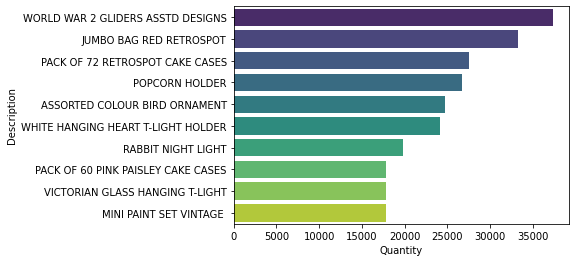

In [ ]:
# Top 10 products by quantity sold
product_group = retail_train_df.groupby('Description')
product_df = pd.DataFrame(product_group['Quantity'].agg(np.sum).nlargest(10))
print(product_df,"\n")

# Bar Plot
sns.barplot(x=product_df.Quantity,y=product_df.index,palette='viridis')

# Observations:
# WW2 Gliders have been sold the most (37,334 units), followed by bags, cases, holders and ornaments

                                UnitPrice
Description                              
Manual                           38970.00
AMAZON FEE                       17836.46
Adjust bad debt                  11062.06
POSTAGE                           8142.75
DOTCOM POSTAGE                    2275.54
CRUK Commission                   1038.75
Bank Charges                       966.92
PICNIC BASKET WICKER 60 PIECES     649.50
SAMPLES                            570.00
Discount                           434.51 



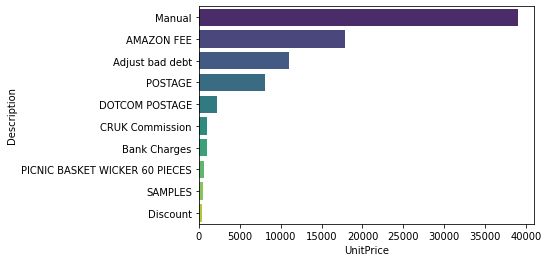

In [ ]:
# Top 10 products by Unit Price
product_df = pd.DataFrame(product_group['UnitPrice'].agg(np.max).nlargest(10))
print(product_df,"\n")

# Bar Plot
sns.barplot(x=product_df.UnitPrice,y=product_df.index,palette='viridis')

# Observations:
# fees, commissions, postage and bank charges featured in top items with high unit price

                                        Sales
Description                                  
DOTCOM POSTAGE                      137500.58
REGENCY CAKESTAND 3 TIER            114150.01
PARTY BUNTING                        68053.66
WHITE HANGING HEART T-LIGHT HOLDER   67594.48
JUMBO BAG RED RETROSPOT              65013.40
PAPER CHAIN KIT 50'S CHRISTMAS       47545.17
RABBIT NIGHT LIGHT                   41717.92
ASSORTED COLOUR BIRD ORNAMENT        40022.23
PICNIC BASKET WICKER 60 PIECES       39619.50
CHILLI LIGHTS                        37944.06 



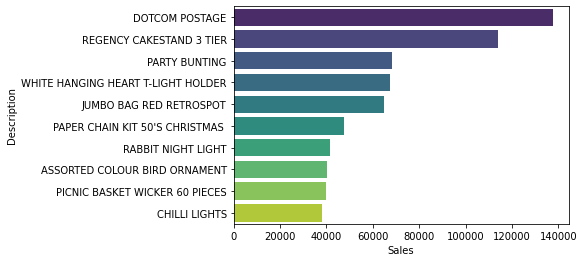

In [ ]:
# Top 10 products by Value
product_df = pd.DataFrame(product_group['Sales'].agg(np.sum).nlargest(10))
print(product_df,"\n")

# Bar Plot
sns.barplot(x=product_df.Sales,y=product_df.index,palette='viridis')

# Observations:
# DOTCOm Postage and cake Stand accounted for ~250,000 sales followed by holders, bags, ornament and lights 

            Quantity
CustomerID          
13875.0        81661
15912.0        74850
14911.0        40963
14096.0        31414
12748.0        30929
14606.0        18386
15311.0        14678
14646.0        14608
14276.0        13780
13089.0        12487 



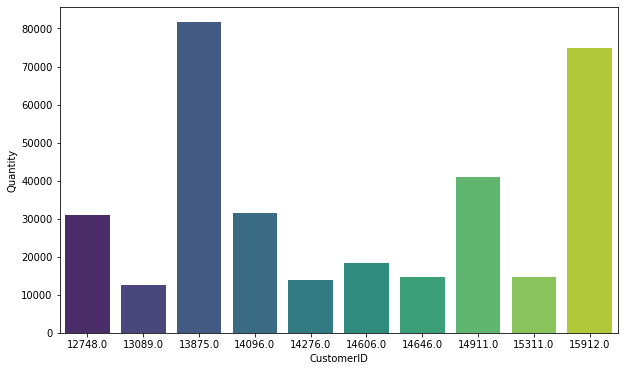

In [ ]:
# Top 10 Customers by Quantity
customer_group = retail_train_df.groupby('CustomerID')
customer_df = pd.DataFrame(customer_group['Quantity'].agg(np.sum).nlargest(10))
print(customer_df,"\n")

# Bar Plot
plt.figure(figsize=(10,6))
sns.barplot(y=customer_df.Quantity,x=customer_df.index,palette='viridis')

# Observations:
# Top 5 customers accounted for ~260,000 units of purchase

                Sales
CustomerID           
13875.0     169737.66
15912.0      78121.24
14911.0      74506.17
14096.0      61394.86
12748.0      60527.89
13113.0      41595.67
14606.0      37189.55
14646.0      29525.49
15311.0      29334.76
13089.0      26357.30 



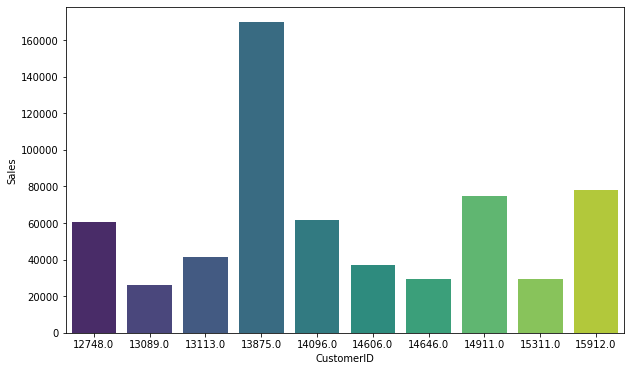

In [ ]:
# Top 10 Customers by Value
customer_group = retail_train_df.groupby('CustomerID')
customer_df = pd.DataFrame(customer_group['Sales'].agg(np.sum).nlargest(10))
print(customer_df,"\n")

# Bar Plot
plt.figure(figsize=(10,6))
sns.barplot(y=customer_df.Sales,x=customer_df.index,palette='viridis')

# Observations:
# 9/10 customers who accounted for high quantity purchase also featured in top 10 sales category

In [ ]:
# Creating date column from datetime column
retail_train_df['Date'] = retail_train_df['InvoiceDate'].dt.date
retail_train_df

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sales,Date
0,558904,22292,HANGING CHICK YELLOW DECORATION,1,2011-07-04 16:18:00,1.25,14221.0,United Kingdom,1.25,2011-07-04
1,556072,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,8,2011-06-08 14:57:00,3.75,16126.0,United Kingdom,30.00,2011-06-08
2,551739,21559,STRAWBERRY LUNCH BOX WITH CUTLERY,2,2011-05-04 10:58:00,2.55,18118.0,United Kingdom,5.10,2011-05-04
3,541658,21988,PACK OF 6 SKULL PAPER PLATES,1,2011-01-20 12:16:00,0.85,15529.0,United Kingdom,0.85,2011-01-20
4,538364,85099C,JUMBO BAG BAROQUE BLACK WHITE,10,2010-12-10 17:26:00,1.95,14448.0,United Kingdom,19.50,2010-12-10
...,...,...,...,...,...,...,...,...,...,...
375695,C554864,22962,JAM JAR WITH PINK LID,-4,2011-05-27 10:36:00,0.85,17787.0,United Kingdom,-3.40,2011-05-27
375696,539451,20749,ASSORTED COLOUR MINI CASES,1,2010-12-17 16:59:00,16.98,12749.0,United Kingdom,16.98,2010-12-17
375697,572302,22091,EMPIRE TISSUE BOX,1,2011-10-23 14:47:00,0.39,18116.0,United Kingdom,0.39,2011-10-23
375698,559339,84946,ANTIQUE SILVER T-LIGHT GLASS,60,2011-07-07 16:49:00,1.25,14995.0,United Kingdom,75.00,2011-07-07


In [ ]:
# Trend Analysis
date_group = retail_train_df.groupby('Date')
date_df = pd.DataFrame(date_group['Quantity','Sales'].agg(np.sum))
date_df

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,Quantity,Sales
Date,,
2010-12-01,19399,43276.35
2010-12-02,10285,32480.86
2010-12-03,11324,29945.39
2010-12-05,11071,21719.99
2010-12-06,14753,38000.52
...,...,...
2011-12-05,31727,32119.38
2011-12-06,21066,36708.49
2011-12-07,26945,50010.79


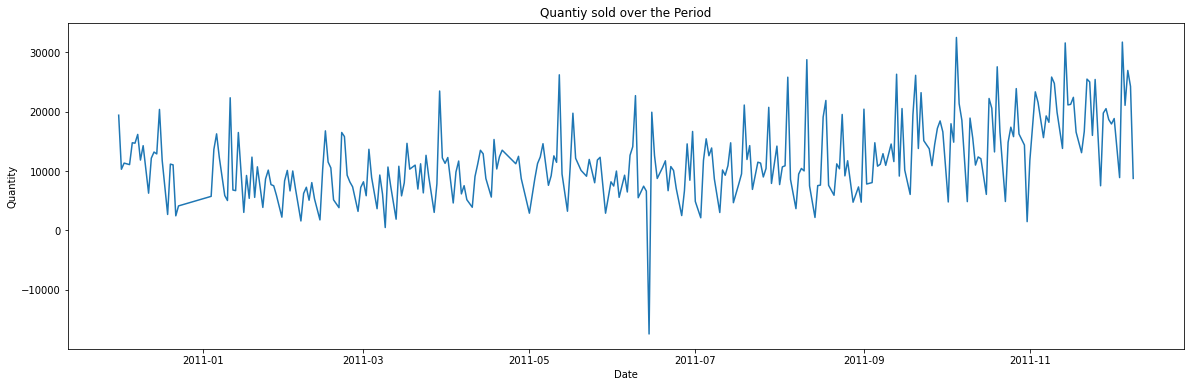

In [ ]:
# Quantity trend over the period

plt.figure(figsize=(20,6))
sns.lineplot(data=date_df,x=date_df.index,y='Quantity')
plt.title("Quantiy sold over the Period")
plt.show()

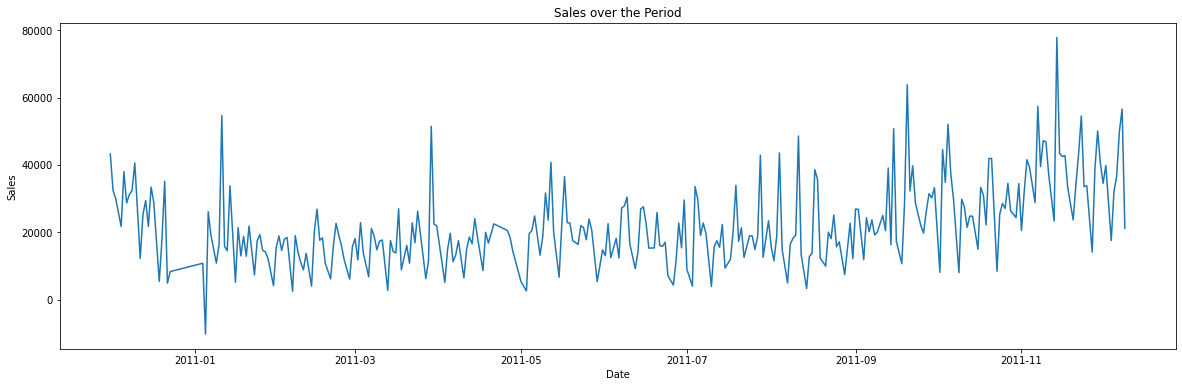

In [ ]:
# Sales trend over the period

plt.figure(figsize=(20,6))
sns.lineplot(data=date_df,x=date_df.index,y='Sales')
plt.title("Sales over the Period")
plt.show()

# Observations:
# On an average, Quantity sold and sales have increased over the period 

In [ ]:
'''
Data Transformation:

2. Perform cohort analysis (a cohort is a group of subjects that share a defining characteristic). 
   Observe how a cohort behaves across time and compare it to other cohorts.

a. Create month cohorts and analyze active customers for each cohort.

b. Analyze the retention rate of customers.
'''

'\nData Transformation:\n\n2. Perform cohort analysis (a cohort is a group of subjects that share a defining characteristic). \n   Observe how a cohort behaves across time and compare it to other cohorts.\n\na. Create month cohorts and analyze active customers for each cohort.\n\nb. Analyze the retention rate of customers.\n'

In [ ]:
# Cohort Analysis
# Creating a column with only year and month

retail_train_df['OrderMonth'] = retail_train_df['InvoiceDate'].dt.to_period('M')
retail_train_df

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sales,Date,OrderMonth
0,558904,22292,HANGING CHICK YELLOW DECORATION,1,2011-07-04 16:18:00,1.25,14221.0,United Kingdom,1.25,2011-07-04,2011-07
1,556072,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,8,2011-06-08 14:57:00,3.75,16126.0,United Kingdom,30.00,2011-06-08,2011-06
2,551739,21559,STRAWBERRY LUNCH BOX WITH CUTLERY,2,2011-05-04 10:58:00,2.55,18118.0,United Kingdom,5.10,2011-05-04,2011-05
3,541658,21988,PACK OF 6 SKULL PAPER PLATES,1,2011-01-20 12:16:00,0.85,15529.0,United Kingdom,0.85,2011-01-20,2011-01
4,538364,85099C,JUMBO BAG BAROQUE BLACK WHITE,10,2010-12-10 17:26:00,1.95,14448.0,United Kingdom,19.50,2010-12-10,2010-12
...,...,...,...,...,...,...,...,...,...,...,...
375695,C554864,22962,JAM JAR WITH PINK LID,-4,2011-05-27 10:36:00,0.85,17787.0,United Kingdom,-3.40,2011-05-27,2011-05
375696,539451,20749,ASSORTED COLOUR MINI CASES,1,2010-12-17 16:59:00,16.98,12749.0,United Kingdom,16.98,2010-12-17,2010-12
375697,572302,22091,EMPIRE TISSUE BOX,1,2011-10-23 14:47:00,0.39,18116.0,United Kingdom,0.39,2011-10-23,2011-10
375698,559339,84946,ANTIQUE SILVER T-LIGHT GLASS,60,2011-07-07 16:49:00,1.25,14995.0,United Kingdom,75.00,2011-07-07,2011-07


In [ ]:
# Creating cohorts based on first purchase period (month) of a customer 
retail_train_df['Cohort'] = retail_train_df.groupby('CustomerID')['InvoiceDate'].transform('min').dt.to_period('M')
retail_train_df

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sales,Date,OrderMonth,Cohort
0,558904,22292,HANGING CHICK YELLOW DECORATION,1,2011-07-04 16:18:00,1.25,14221.0,United Kingdom,1.25,2011-07-04,2011-07,2010-12
1,556072,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,8,2011-06-08 14:57:00,3.75,16126.0,United Kingdom,30.00,2011-06-08,2011-06,2010-12
2,551739,21559,STRAWBERRY LUNCH BOX WITH CUTLERY,2,2011-05-04 10:58:00,2.55,18118.0,United Kingdom,5.10,2011-05-04,2011-05,2010-12
3,541658,21988,PACK OF 6 SKULL PAPER PLATES,1,2011-01-20 12:16:00,0.85,15529.0,United Kingdom,0.85,2011-01-20,2011-01,2010-12
4,538364,85099C,JUMBO BAG BAROQUE BLACK WHITE,10,2010-12-10 17:26:00,1.95,14448.0,United Kingdom,19.50,2010-12-10,2010-12,2010-12
...,...,...,...,...,...,...,...,...,...,...,...,...
375695,C554864,22962,JAM JAR WITH PINK LID,-4,2011-05-27 10:36:00,0.85,17787.0,United Kingdom,-3.40,2011-05-27,2011-05,2010-12
375696,539451,20749,ASSORTED COLOUR MINI CASES,1,2010-12-17 16:59:00,16.98,12749.0,United Kingdom,16.98,2010-12-17,2010-12,2010-12
375697,572302,22091,EMPIRE TISSUE BOX,1,2011-10-23 14:47:00,0.39,18116.0,United Kingdom,0.39,2011-10-23,2011-10,2010-12
375698,559339,84946,ANTIQUE SILVER T-LIGHT GLASS,60,2011-07-07 16:49:00,1.25,14995.0,United Kingdom,75.00,2011-07-07,2011-07,2010-12


In [ ]:
# Computing unique customers in each cohort during the period
cohort_df = retail_train_df.groupby(['Cohort', 'OrderMonth']).agg(N_Customers=('CustomerID', 'nunique')).reset_index(drop=False)
cohort_df

,Cohort,OrderMonth,N_Customers
0,2010-12,2010-12,4730
1,2010-12,2011-01,4028
2,2010-12,2011-02,3843
3,2010-12,2011-03,4073
4,2010-12,2011-04,3893
...,...,...,...
85,2011-10,2011-10,22
86,2011-10,2011-11,5
87,2011-11,2011-11,25
88,2011-11,2011-12,1


In [ ]:
# Computing period number for cohorts
from operator import attrgetter

cohort_df['PeriodNumber'] = (cohort_df.OrderMonth - cohort_df.Cohort).apply(attrgetter('n'))
cohort_df

,Cohort,OrderMonth,N_Customers,PeriodNumber
0,2010-12,2010-12,4730,0
1,2010-12,2011-01,4028,1
2,2010-12,2011-02,3843,2
3,2010-12,2011-03,4073,3
4,2010-12,2011-04,3893,4
...,...,...,...,...
85,2011-10,2011-10,22,0
86,2011-10,2011-11,5,1
87,2011-11,2011-11,25,0
88,2011-11,2011-12,1,1


In [ ]:
# Creating a table with cohorts in rows and period number in columns with Number of customers as values

cohort_pivot = cohort_df.pivot_table(index = 'Cohort',
                                     columns = 'PeriodNumber',
                                     values = 'N_Customers')
cohort_pivot

PeriodNumber,0,1,2,3,4,5,6,7,8,9,10,11,12
Cohort,,,,,,,,,,,,,
2010-12,4730.0,4028.0,3843.0,4073.0,3893.0,4090.0,4084.0,4134.0,4030.0,4317.0,4410.0,4538.0,3710.0
2011-01,464.0,243.0,283.0,247.0,286.0,285.0,288.0,277.0,318.0,345.0,380.0,236.0,NaN
2011-02,152.0,80.0,71.0,77.0,77.0,82.0,78.0,80.0,91.0,106.0,67.0,NaN,NaN
2011-03,123.0,40.0,43.0,52.0,58.0,53.0,72.0,74.0,76.0,44.0,NaN,NaN,NaN
2011-04,68.0,26.0,22.0,26.0,21.0,30.0,31.0,43.0,18.0,NaN,NaN,NaN,NaN
2011-05,55.0,15.0,18.0,12.0,21.0,21.0,23.0,8.0,NaN,NaN,NaN,NaN,NaN
2011-06,35.0,10.0,7.0,10.0,14.0,17.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN
2011-07,25.0,5.0,4.0,8.0,9.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08,23.0,4.0,11.0,12.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Overall retention values
Total_df = pd.DataFrame(cohort_pivot.sum(axis=0)).rename(columns={0: 'Total Value'}).transpose()
Total_Pct_df = Total_df.divide(Total_df.iloc[:,0],axis=0)
Total_Pct_df

PeriodNumber,0,1,2,3,4,5,6,7,8,9,10,11,12
Total Value,1.0,0.776675,0.750392,0.786423,0.762576,0.797563,0.797215,0.803481,0.789034,0.837598,0.845431,0.830983,0.645779


In [ ]:
# Divide each element in a row by its first element to fetch retention percentages

cohort_size = cohort_pivot.iloc[:,0]
retention_matrix = cohort_pivot.divide(cohort_size, axis = 0)

retention_matrix

PeriodNumber,0,1,2,3,4,5,6,7,8,9,10,11,12
Cohort,,,,,,,,,,,,,
2010-12,1.0,0.851586,0.812474,0.861099,0.823044,0.864693,0.863425,0.873996,0.852008,0.912685,0.932347,0.959408,0.784355
2011-01,1.0,0.523707,0.609914,0.532328,0.616379,0.614224,0.620690,0.596983,0.685345,0.743534,0.818966,0.508621,NaN
2011-02,1.0,0.526316,0.467105,0.506579,0.506579,0.539474,0.513158,0.526316,0.598684,0.697368,0.440789,NaN,NaN
2011-03,1.0,0.325203,0.349593,0.422764,0.471545,0.430894,0.585366,0.601626,0.617886,0.357724,NaN,NaN,NaN
2011-04,1.0,0.382353,0.323529,0.382353,0.308824,0.441176,0.455882,0.632353,0.264706,NaN,NaN,NaN,NaN
2011-05,1.0,0.272727,0.327273,0.218182,0.381818,0.381818,0.418182,0.145455,NaN,NaN,NaN,NaN,NaN
2011-06,1.0,0.285714,0.200000,0.285714,0.400000,0.485714,0.114286,NaN,NaN,NaN,NaN,NaN,NaN
2011-07,1.0,0.200000,0.160000,0.320000,0.360000,0.160000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08,1.0,0.173913,0.478261,0.521739,0.086957,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


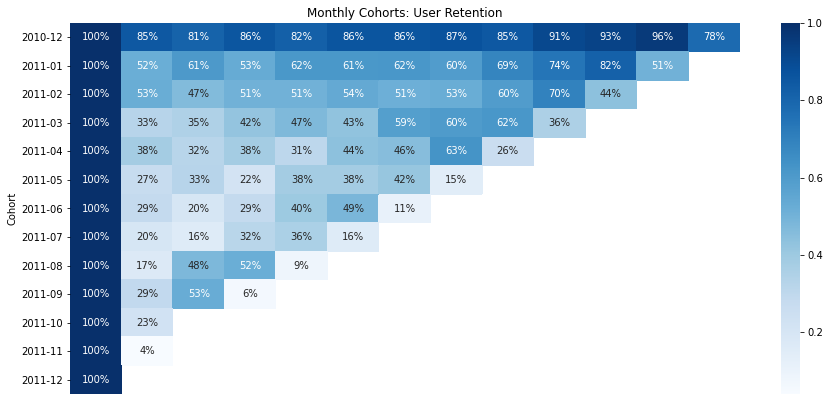

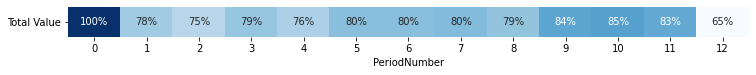

In [ ]:
# Plotting User Retention Matrix

plt.figure(figsize=(15,15))
plt.subplot(2,1,1)
sns.heatmap(retention_matrix,mask=retention_matrix.isna(),annot=True,cmap='Blues',fmt=".0%")
plt.title("Monthly Cohorts: User Retention")
plt.xticks(ticks=[])
plt.xlabel("")

plt.figure(figsize=(12.2,1.2))
plt.subplot(2,1,2)
sns.heatmap(Total_Pct_df,annot=True,cmap='Blues',fmt=".0%",cbar=False)
plt.yticks(rotation=0)
plt.show()

# Observations:
# Initial cohorts have higher retention rates compared to the recent ones
# Retention rates increased in September, October and November 2011 before dropping in December
# Since, We have partial data for December 2011, We should not take that month into consideration

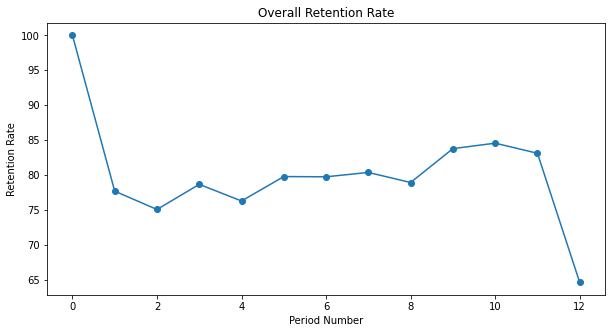

In [ ]:
# Plotting overall retention trend
plt.figure(figsize=(10,5))
plt.plot(Total_Pct_df.transpose().mul(100),marker='o')
plt.title("Overall Retention Rate")
plt.xlabel("Period Number")
plt.ylabel("Retention Rate")
plt.show()

# Observations:
# Retention rates decreased initially before surging in later periods

In [ ]:
'''
Data Modeling :

1. Build a RFM (Recency Frequency Monetary) model. Recency means the number of days since a customer made the last purchase. 
Frequency is the number of purchase in a given period. It could be 3 months, 6 months or 1 year. 
Monetary is the total amount of money a customer spent in that given period. Therefore, big spenders will be differentiated among other customers
such as MVP (Minimum Viable Product) or VIP.

2. Calculate RFM metrics.

3. Build RFM Segments. Give recency, frequency, and monetary scores individually by dividing them into quartiles.

b1. Combine three ratings to get a RFM segment (as strings).

b2. Get the RFM score by adding up the three ratings.

b3. Analyze the RFM segments by summarizing them and comment on the findings.

Note: Rate “recency" for customer who has been active more recently higher than the less recent customer, because each company wants its customers to be recent.

Note: Rate “frequency" and “monetary" higher, because the company wants the customer to visit more often and spend more money
'''

'\nData Modeling :\n\n1. Build a RFM (Recency Frequency Monetary) model. Recency means the number of days since a customer made the last purchase. \nFrequency is the number of purchase in a given period. It could be 3 months, 6 months or 1 year. \nMonetary is the total amount of money a customer spent in that given period. Therefore, big spenders will be differentiated among other customers\nsuch as MVP (Minimum Viable Product) or VIP.\n\n2. Calculate RFM metrics.\n\n3. Build RFM Segments. Give recency, frequency, and monetary scores individually by dividing them into quartiles.\n\nb1. Combine three ratings to get a RFM segment (as strings).\n\nb2. Get the RFM score by adding up the three ratings.\n\nb3. Analyze the RFM segments by summarizing them and comment on the findings.\n\nNote: Rate “recency" for customer who has been active more recently higher than the less recent customer, because each company wants its customers to be recent.\n\nNote: Rate “frequency" and “monetary" higher,

In [ ]:
# Create reference date to compute recency
from datetime import timedelta

ref_date = retail_train_df['InvoiceDate'].max() + timedelta(days=1)
print(ref_date)

2011-12-10 12:50:00


In [ ]:
# Computing Recency, Frequency and Monetary value
rfm_df = retail_train_df.groupby(['CustomerID']).agg({
            'InvoiceDate': lambda x: (ref_date - x.max()).days,
            'InvoiceNo': 'count',
            'Sales': 'sum'})

rfm_df

,InvoiceDate,InvoiceNo,Sales
CustomerID,,,
12346.0,154,2,11.75
12347.0,2,130,1937.78
12348.0,2,20,460.45
12349.0,5,49,1025.87
12350.0,11,11,139.60
...,...,...,...
18280.0,7,5,68.62
18281.0,72,5,37.45
18282.0,99,9,127.82


In [ ]:
# Renaming columns
rfm_df.rename(columns={'InvoiceDate':'Recency','InvoiceNo':'Frequency','Sales':'MonetaryValue'},inplace=True)
rfm_df

,Recency,Frequency,MonetaryValue
CustomerID,,,
12346.0,154,2,11.75
12347.0,2,130,1937.78
12348.0,2,20,460.45
12349.0,5,49,1025.87
12350.0,11,11,139.60
...,...,...,...
18280.0,7,5,68.62
18281.0,72,5,37.45
18282.0,99,9,127.82


In [ ]:
# Computing RFM Scores by dividing them into quartiles
r_group = pd.qcut(rfm_df['Recency'].rank(method='first'),q=4,labels=range(4,0,-1))
f_group = pd.qcut(rfm_df['Frequency'],q=4,labels=range(1,5))
m_group = pd.qcut(rfm_df['MonetaryValue'],q=4,labels=range(1,5))

# Appending R,F and M scores to the data frame
rfm_df = rfm_df.assign(R=r_group.values,F=f_group.values,M=m_group.values)
rfm_df

,Recency,Frequency,MonetaryValue,R,F,M
CustomerID,,,,,,
12346.0,154,2,11.75,1,1,1
12347.0,2,130,1937.78,3,4,4
12348.0,2,20,460.45,3,2,2
12349.0,5,49,1025.87,2,3,3
12350.0,11,11,139.60,1,1,1
...,...,...,...,...,...,...
18280.0,7,5,68.62,2,1,1
18281.0,72,5,37.45,1,1,1
18282.0,99,9,127.82,1,1,1


In [ ]:
# Concatenating RFM values to create RFM segments
def rfm_seg(x):
  return str(x['R'])+str(x['F'])+str(x['M'])

rfm_df['RFMSegment'] = rfm_df.apply(rfm_seg,axis=1)
rfm_df

,Recency,Frequency,MonetaryValue,R,F,M,RFMSegment
CustomerID,,,,,,,
12346.0,154,2,11.75,1,1,1,111
12347.0,2,130,1937.78,3,4,4,344
12348.0,2,20,460.45,3,2,2,322
12349.0,5,49,1025.87,2,3,3,233
12350.0,11,11,139.60,1,1,1,111
...,...,...,...,...,...,...,...
18280.0,7,5,68.62,2,1,1,211
18281.0,72,5,37.45,1,1,1,111
18282.0,99,9,127.82,1,1,1,111


In [ ]:
# Number of Segments
rfm_df['RFMSegment'].nunique()

# Observations:
# 60 unique segments are present

60

In [ ]:
# Computing RFM Score
rfm_df['RFMScore'] = rfm_df[['R','F','M']].sum(axis=1)
rfm_df

,Recency,Frequency,MonetaryValue,R,F,M,RFMSegment,RFMScore
CustomerID,,,,,,,,
12346.0,154,2,11.75,1,1,1,111,3
12347.0,2,130,1937.78,3,4,4,344,11
12348.0,2,20,460.45,3,2,2,322,7
12349.0,5,49,1025.87,2,3,3,233,8
12350.0,11,11,139.60,1,1,1,111,3
...,...,...,...,...,...,...,...,...
18280.0,7,5,68.62,2,1,1,211,4
18281.0,72,5,37.45,1,1,1,111,3
18282.0,99,9,127.82,1,1,1,111,3


In [ ]:
# Grouping customers into 6 RFM levels
# Define rfm_level function
def rfm_level(df):
    if df['RFMScore'] >= 9:
        return 'Can\'t Loose Them'
    elif ((df['RFMScore'] >= 8) and (df['RFMScore'] < 9)):
        return 'Champions'
    elif ((df['RFMScore'] >= 7) and (df['RFMScore'] < 8)):
        return 'Loyal'
    elif ((df['RFMScore'] >= 6) and (df['RFMScore'] < 7)):
        return 'Potential'
    elif ((df['RFMScore'] >= 5) and (df['RFMScore'] < 6)):
        return 'Promising'
    elif ((df['RFMScore'] >= 4) and (df['RFMScore'] < 5)):
        return 'Needs Attention'
    else:
        return 'Require Activation'


# Creating a new variable RFMLevel
rfm_df['RFMLevel'] = rfm_df.apply(rfm_level, axis=1)
rfm_df

,Recency,Frequency,MonetaryValue,R,F,M,RFMSegment,RFMScore,RFMLevel
CustomerID,,,,,,,,,
12346.0,154,2,11.75,1,1,1,111,3,Require Activation
12347.0,2,130,1937.78,3,4,4,344,11,Can't Loose Them
12348.0,2,20,460.45,3,2,2,322,7,Loyal
12349.0,5,49,1025.87,2,3,3,233,8,Champions
12350.0,11,11,139.60,1,1,1,111,3,Require Activation
...,...,...,...,...,...,...,...,...,...
18280.0,7,5,68.62,2,1,1,211,4,Needs Attention
18281.0,72,5,37.45,1,1,1,111,3,Require Activation
18282.0,99,9,127.82,1,1,1,111,3,Require Activation


In [ ]:
!pip install squarify

In [ ]:
# RFM Level Counts and Percentage
rfm_levels = pd.DataFrame(pd.concat([pd.DataFrame(rfm_df['RFMLevel'].value_counts()),pd.DataFrame(rfm_df['RFMLevel'].value_counts(normalize=True).mul(100).round(2))],axis=1))
rfm_levels.columns=['Count','Percent']
rfm_levels

,Count,Percent
Can't Loose Them,2225,38.73
Require Activation,800,13.93
Champions,649,11.30
Potential,594,10.34
Loyal,585,10.18
Promising,501,8.72
Needs Attention,391,6.81


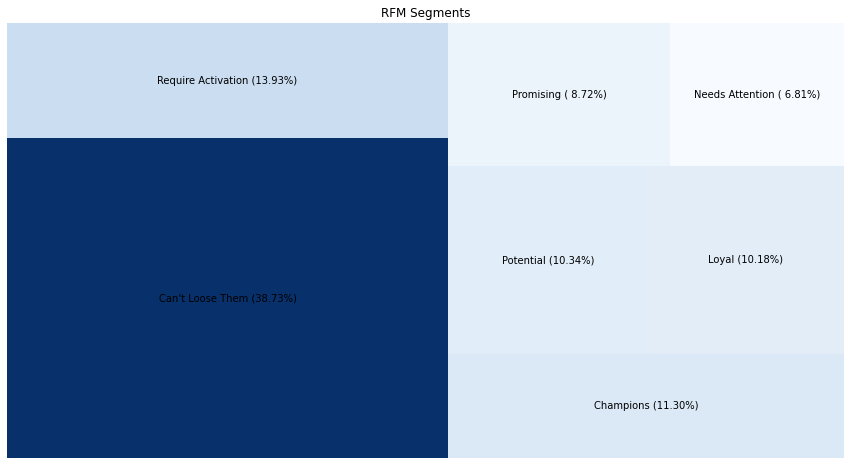

In [ ]:
# Plotting RFM Levels
import matplotlib
import squarify

plt.figure(figsize=(15,8))

# Color Settings
norm = matplotlib.colors.Normalize(vmin=min(rfm_levels.Count), vmax=max(rfm_levels.Count))
colors = [matplotlib.cm.Blues(norm(value)) for value in rfm_levels.Count]

# Label Settings
perc = [str('{:5.2f}'.format(i/rfm_levels['Count'].sum()*100)) + "%" for i in rfm_levels['Count']]
lbl = [el[0] + " (" + el[1] + ")" for el in zip(rfm_levels.index, perc)]

# Square Plot
squarify.plot(sizes=rfm_levels.Count,label=lbl,color=colors)
plt.title("RFM Segments")
plt.axis('off')
plt.show()

In [ ]:
'''
Data Modeling :

1. Create clusters using k-means clustering algorithm.

a. Prepare the data for the algorithm. If the data is asymmetrically distributed, manage the skewness with appropriate transformation. Standardize the data.

b. Decide the optimum number of clusters to be formed.

c. Analyze these clusters and comment on the results.
'''

In [ ]:
# Grouping by customer ID
final_df = retail_train_df.groupby(['CustomerID']).agg({
            'InvoiceDate': lambda x: (ref_date - x.max()).days,
            'InvoiceNo': 'count',
            'Sales': 'sum',
            'Description':'count',
            'Quantity':'sum',
            'Country':'nunique'})

# Renaming columns
final_df.rename(columns={'InvoiceDate':'Recency','InvoiceNo':'Frequency','Description':'ItemCount','Country':'CountryCount'},inplace=True)
final_df

,Recency,Frequency,Sales,ItemCount,Quantity,CountryCount
CustomerID,,,,,,
12346.0,154,2,11.75,2,26,1
12347.0,2,130,1937.78,130,1519,9
12348.0,2,20,460.45,20,103,3
12349.0,5,49,1025.87,49,345,4
12350.0,11,11,139.60,11,164,1
...,...,...,...,...,...,...
18280.0,7,5,68.62,5,38,2
18281.0,72,5,37.45,5,18,1
18282.0,99,9,127.82,9,71,2


In [ ]:
# Appending RFM Score to the final data
final_df['RFMScore'] = rfm_df['RFMScore']
final_df

,Recency,Frequency,Sales,ItemCount,Quantity,CountryCount,RFMScore
CustomerID,,,,,,,
12346.0,154,2,11.75,2,26,1,3
12347.0,2,130,1937.78,130,1519,9,11
12348.0,2,20,460.45,20,103,3,7
12349.0,5,49,1025.87,49,345,4,8
12350.0,11,11,139.60,11,164,1,3
...,...,...,...,...,...,...,...
18280.0,7,5,68.62,5,38,2,4
18281.0,72,5,37.45,5,18,1,3
18282.0,99,9,127.82,9,71,2,3


In [ ]:
# Standardizing Data
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()

# Fitting and transforming final data frame
final_scaled_df = mms.fit_transform(final_df)

# Converting array into dataframe
final_scaled_df = pd.DataFrame(final_scaled_df,columns=final_df.columns)
final_scaled_df.index = final_df.index
final_scaled_df

,Recency,Frequency,Sales,ItemCount,Quantity,CountryCount,RFMScore
CustomerID,,,,,,,
12346.0,0.412399,0.000184,0.497404,0.000184,0.497591,0.000000,0.000000
12347.0,0.002695,0.023674,0.503108,0.023674,0.506779,0.275862,0.888889
12348.0,0.002695,0.003487,0.498733,0.003487,0.498064,0.068966,0.444444
12349.0,0.010782,0.008809,0.500407,0.008809,0.499554,0.103448,0.555556
12350.0,0.026954,0.001835,0.497783,0.001835,0.498440,0.000000,0.000000
...,...,...,...,...,...,...,...
18280.0,0.016173,0.000734,0.497573,0.000734,0.497664,0.034483,0.111111
18281.0,0.191375,0.000734,0.497480,0.000734,0.497541,0.000000,0.000000
18282.0,0.264151,0.001468,0.497748,0.001468,0.497868,0.034483,0.000000


In [ ]:
# KMeans Clustering
from sklearn.cluster import KMeans

# defining the kmeans function with initialization as k-means++
kmeans = KMeans(n_clusters=5, init='k-means++')

# fitting the k means algorithm on scaled data
kmeans.fit(final_scaled_df)

# inertia on the fitted data
kmeans.inertia_

81.17208309295953

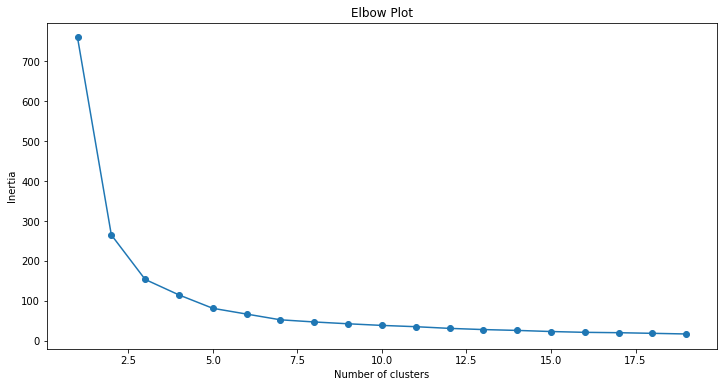

In [ ]:
# Finding optimum  number of columns
# fitting multiple k-means algorithms and storing the values in an empty list
SSE = []
for cluster in range(1,20):
    kmeans = KMeans(n_jobs = -1, n_clusters = cluster, init='k-means++',random_state=10)
    kmeans.fit(final_scaled_df)
    SSE.append(kmeans.inertia_)

# converting the results into a dataframe and plotting them
sse_df = pd.DataFrame({'Cluster':range(1,20), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(sse_df['Cluster'], sse_df['SSE'], marker='o')
plt.title("Elbow Plot")
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

# Observations:
# Optimal number of clusters using elbow plot is ambiguous in this case
# K=3,4 or 5 according to elbow plot 

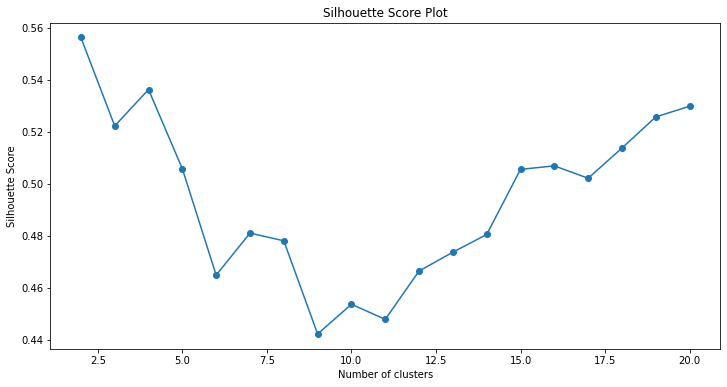

In [ ]:
# Finding optimal 'K' using Silhouette Score
from sklearn.metrics import silhouette_score

sil = []
for cluster in range(2,21):
    kmeans = KMeans(n_jobs=-1,n_clusters = cluster, init='k-means++',random_state=10)
    kmeans.fit_predict(final_scaled_df)
    sil.append(silhouette_score(final_scaled_df,kmeans.labels_))

# converting the results into a dataframe and plotting them
sil_df = pd.DataFrame({'Cluster':range(2,21), 'Sil':sil})
plt.figure(figsize=(12,6))
plt.plot(sil_df['Cluster'], sil_df['Sil'], marker='o')
plt.title("Silhouette Score Plot")
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()

# Observations:
# K=2 have higher silhouette score where as k=4 have a silhouette score close to k=2
# Optimal Number of clusters, k=2 or 4 

In [ ]:
# defining the kmeans function with initialization as k-means++
kmeans = KMeans(n_clusters=4, init='k-means++',random_state=10)

# fitting the k means algorithm on scaled data
y_pred = kmeans.fit_predict(final_scaled_df)

# inertia on the fitted data
kmeans.inertia_

114.71580778870005

In [ ]:
# Predicted Clusters
y_pred = pd.DataFrame(y_pred,columns=['Cluster'])
y_pred.index = final_df.index
y_pred

,Cluster
CustomerID,
12346.0,3
12347.0,1
12348.0,2
12349.0,2
12350.0,0
...,...
18280.0,0
18281.0,0
18282.0,0


In [ ]:
# Appending clusters to original dataframe
final_df['Cluster'] = y_pred['Cluster']
final_df

,Recency,Frequency,Sales,ItemCount,Quantity,CountryCount,RFMScore,Cluster
CustomerID,,,,,,,,
12346.0,154,2,11.75,2,26,1,3,3
12347.0,2,130,1937.78,130,1519,9,11,1
12348.0,2,20,460.45,20,103,3,7,2
12349.0,5,49,1025.87,49,345,4,8,2
12350.0,11,11,139.60,11,164,1,3,0
...,...,...,...,...,...,...,...,...
18280.0,7,5,68.62,5,38,2,4,0
18281.0,72,5,37.45,5,18,1,3,0
18282.0,99,9,127.82,9,71,2,3,0


2    2324
1    1729
0    1562
3     130
Name: Cluster, dtype: int64


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



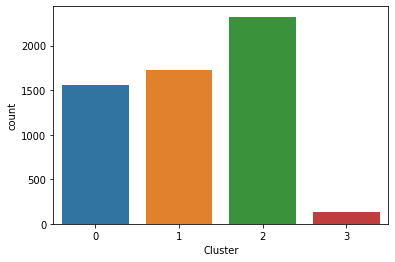

In [ ]:
# Count of customers in each of the clusters
print(final_df['Cluster'].value_counts())
sns.countplot(final_df['Cluster'])
plt.show()

# Observations:
# Cluster 2 has maximum number of customers(2324) where as cluster 3 has the minimum(130)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



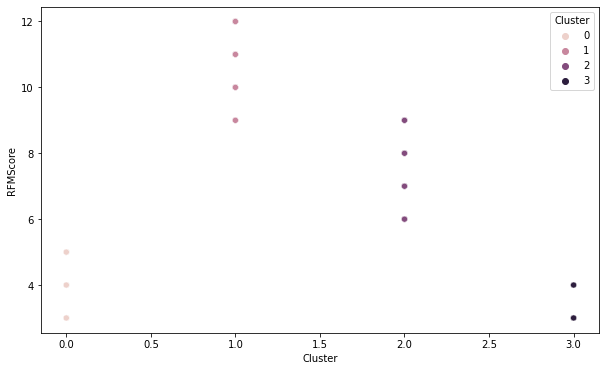

In [ ]:
# Visualizing Clusters
plt.figure(figsize=(10,6))
sns.scatterplot(final_df['Cluster'],final_df['RFMScore'],hue=final_df['Cluster'])

# Observations:
# Cluster 1- RFM Score <= 5 --Customers who need attention(Promising, Needs attention)
# Cluster 2- RFM Score > 9 --Customers you can't afford to loose (High Value Customers)
# Cluster 3- RFM Score between 6 and 9 --Loyal customers with potential to become high value customers(Champions,Loyal,Potential)
# Clsuter 4- RFM Score <=4 --Customers who require some reactivation campaigns(Require Activation)